# Chapter 8 - Optimizing and Visualizing Quantum Circuits
This Jupyter notebook has been updated to work with Python 3.13, Qiskit v 2.1, Qiskit runtime version: 0.40.
|||
|-|-|
|**Author:** |Robert Loredo|
|**Reviewer:** |Alain Chancé|
|**Date:** |August 28, 2025|
|**Version:** |**2.00**<br/>*Details see at the end of this notebook*|
|**References:**|
[Robert Loredo, Learn Quantum Computing with Python and IBM Quantum: Write your own practical quantum programs with Python, Second Edition, Packt, Feb 25, 2025](https://www.packtpub.com/en-us/product/learn-quantum-computing-with-python-and-ibm-quantum-9781803240923)
[Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/Chapter 8 - Optimizing and Visualizing Circuits FinalV2.ipynb](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/Chapter%208%20-%20Optimizing%20and%20Visualizing%20Circuits%20FinalV2.ipynb)
[Packt's code repository for the book](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition)
[LICENSE](https://github.com/PacktPublishing/Learning-Quantum-Computing-with-Python-and-IBM-Quantum-Second-Edition/blob/main/LICENSE)
[Migrate from qiskit_ibm_provider/Get a backend](https://docs.quantum.ibm.com/migration-guides/qiskit-runtime-from-ibm-provider#get-a-backend)
[FakeBrisbane](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake-provider-fake-brisbane)
[FakePerth](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake-provider-fake-perth)
[Graphviz is open source graph visualization software](https://graphviz.org/about/)
<br/>

In [1]:
# Load helper file
%run helper_file_1.0.ipynb

Qiskit version: 2.1.1
Qiskit runtime version: 0.40.1
/home/alain/miniconda3/bin/python
Python 3.13.5


In [2]:
# Import the transpiler passes object
from qiskit.transpiler import passes
# List out all the passes available
print(dir(passes))


['ALAPScheduleAnalysis', 'AQCSynthesisPlugin', 'ASAPScheduleAnalysis', 'ApplyLayout', 'BarrierBeforeFinalMeasurements', 'BasicSwap', 'BasisTranslator', 'CSPLayout', 'CheckGateDirection', 'CheckMap', 'CliffordUnitarySynthesis', 'Collect1qRuns', 'Collect2qBlocks', 'CollectAndCollapse', 'CollectCliffords', 'CollectLinearFunctions', 'CollectMultiQBlocks', 'CommutationAnalysis', 'CommutativeCancellation', 'CommutativeInverseCancellation', 'Commuting2qGateRouter', 'ConsolidateBlocks', 'ConstrainedReschedule', 'ContainsInstruction', 'ContextAwareDynamicalDecoupling', 'ContractIdleWiresInControlFlow', 'CountOps', 'CountOpsLongestPath', 'DAGFixedPoint', 'DAGLongestPath', 'Decompose', 'DenseLayout', 'Depth', 'ElidePermutations', 'EnlargeWithAncilla', 'Error', 'FilterOpNodes', 'FixedPoint', 'FullAncillaAllocation', 'GateDirection', 'GatesInBasis', 'HLSConfig', 'HighLevelSynthesis', 'HoareOptimizer', 'InstructionDurationCheck', 'InverseCancellation', 'Layout2qDistance', 'LayoutTransformation', 'Li

In [3]:
# Get list of backends:
service.backends()

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_torino')>]

## Get a backend

In [4]:
# Modified by Alain Chancé

# Get a backend
# https://docs.quantum.ibm.com/migration-guides/qiskit-runtime-from-ibm-provider#get-a-backend

# Get the backend device: ibm_brisbane
#backend_brisbane = service.get_backend('ibm_brisbane')
# https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake-provider-fake-brisbane
from qiskit_ibm_runtime.fake_provider import FakeBrisbane
backend_brisbane = FakeBrisbane()

# Get the backend device: ibm_nazca
#backend_nazca = service.get_backend('ibm_nazca')
# https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/fake-provider-fake-perth
from qiskit_ibm_runtime.fake_provider import FakePerth
backend_perth =FakePerth()

# NOTE: If the above systems are not available, choose any two systems you have available to you when running this cell as devices may have upgraded since the time of this writing.

### The 'Graphviz' library is required to use 'plot_coupling_map'.  
To install, follow the instructions at https://graphviz.org/download/. 
Qiskit needs the Graphviz binaries, which the 'graphviz' package on pip does not install.

You must install the actual Graphviz software.

On Debian, Ubuntu, run the following command: 
```
sudo apt install graphviz
```

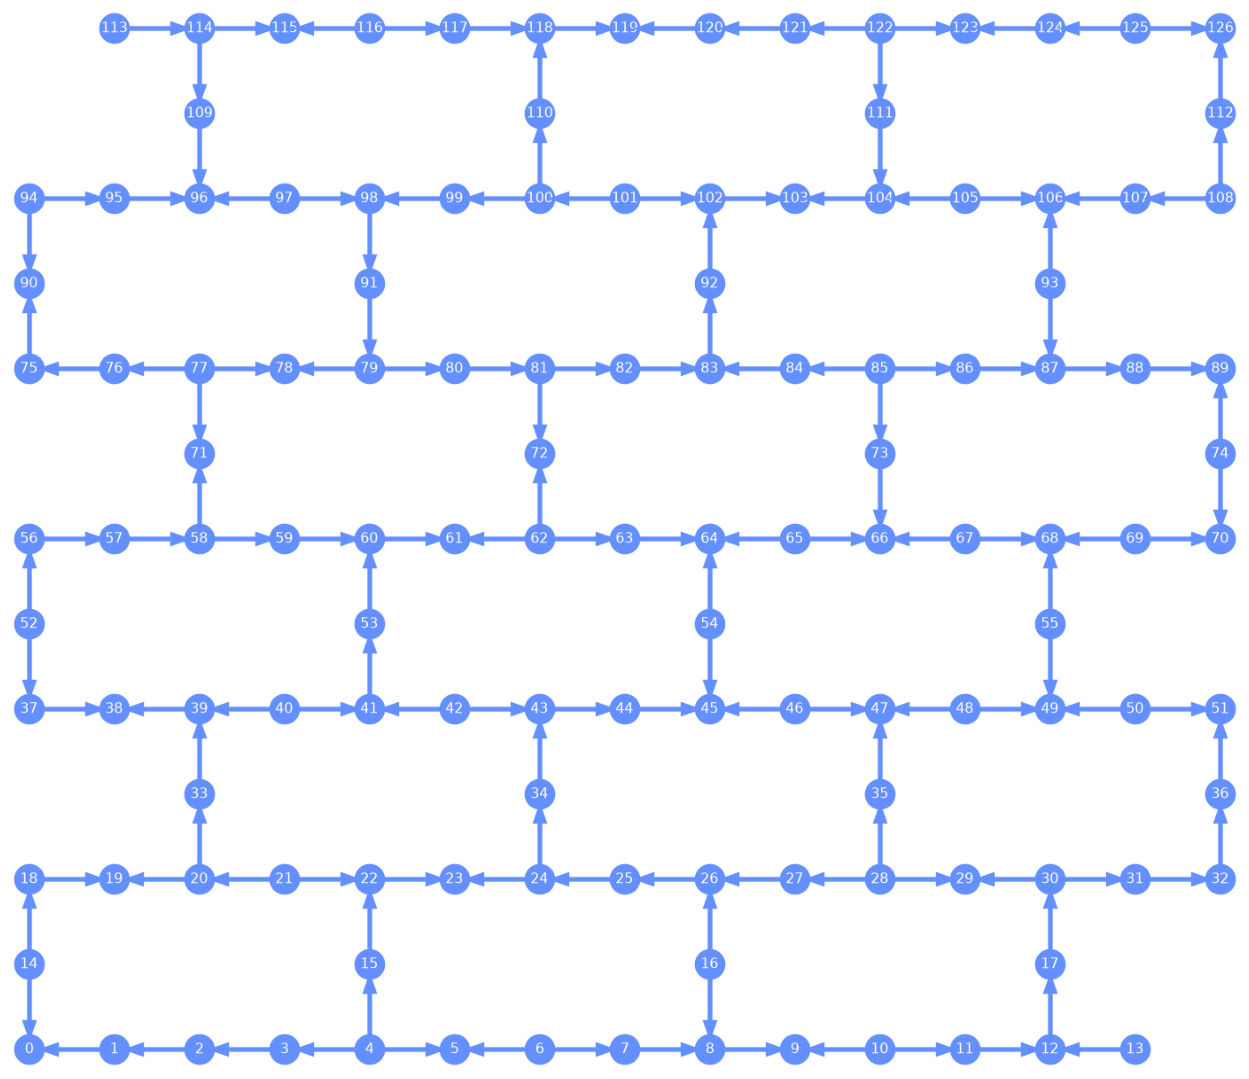

In [5]:
# Visualize the coupling directional map between the qubits
# Modified by Alain Chancé
try:
    display(plot_gate_map(backend_brisbane, plot_directed=True))
except:
    print(sys.exc_info())

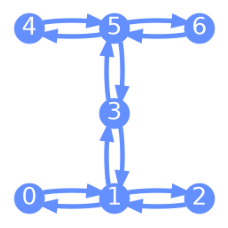

In [6]:
# Visualize the coupling directional map between the qubits 
# Modified by Alain Chancé
#plot_gate_map(backend_nazca, plot_directed=True)
try:
    display(plot_gate_map(backend_perth, plot_directed=True))
except:
    print(sys.exc_info())

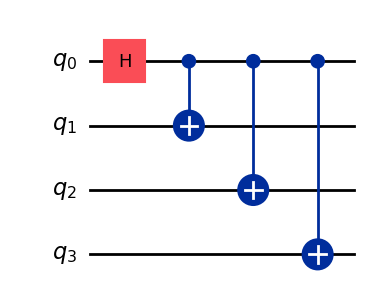

In [7]:
# Quantum circuit with a single and multi-qubit gates
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
qc.cx(0,3)
#circuit_drawer(qc)
qc.draw(output='mpl')

Basic circuit where each of the 4 qubits are entangled via the $CX$ gates to the first qubit, $q_0$.

Depth: 67


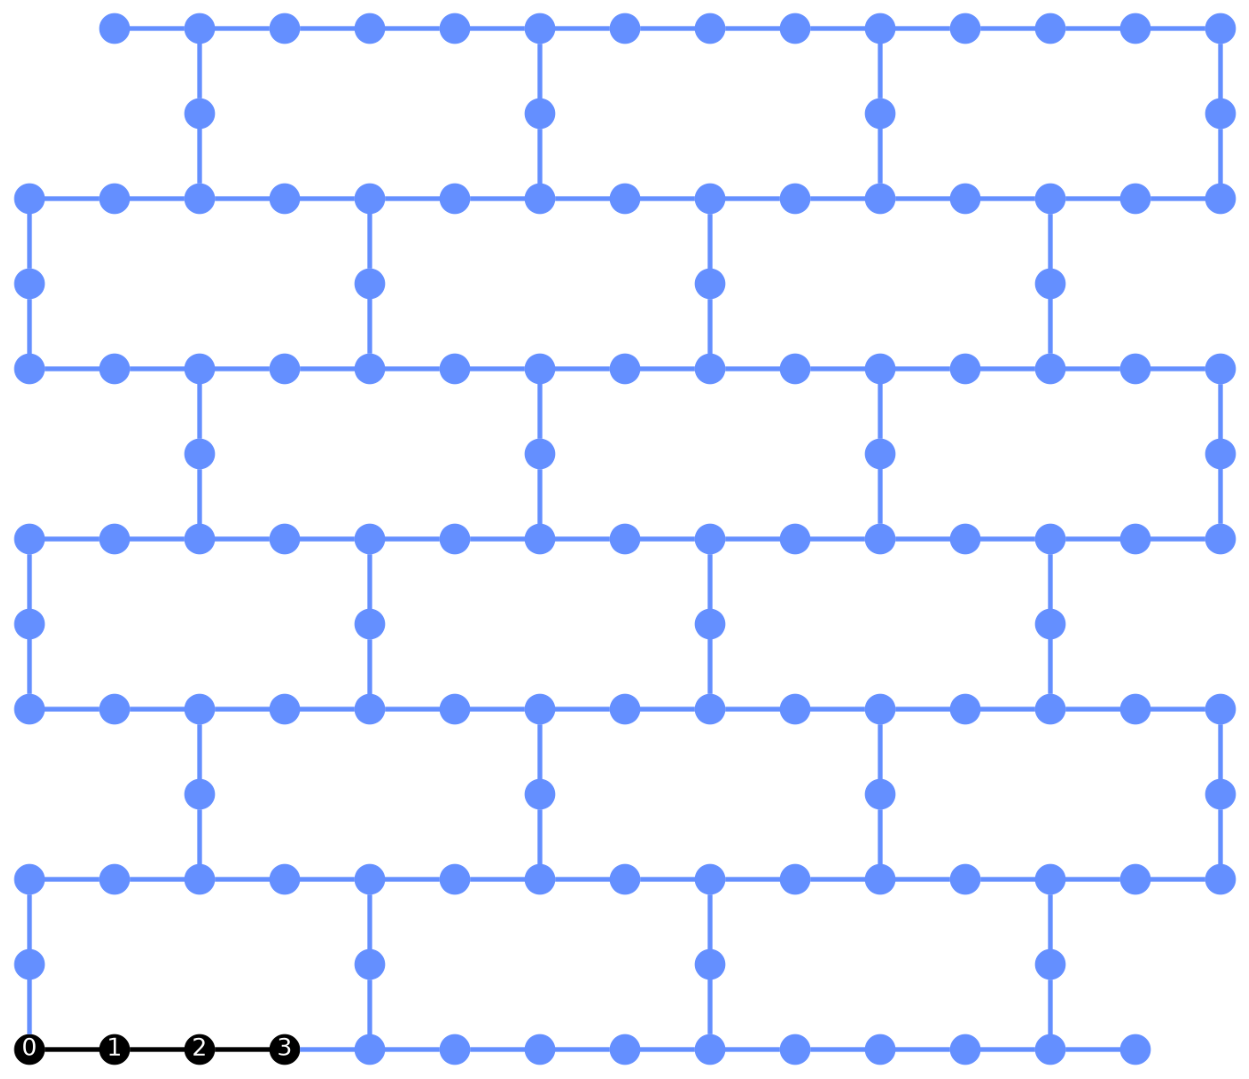

In [8]:
# Generate a preset pass manager:
pass_manager = generate_preset_pass_manager(backend=backend_brisbane, optimization_level=0)

# Transpile the circuit with the optimization level = 0
qc_brisbane_0 = pass_manager.run(qc)

# Print out the depth of the circuit
print('Depth:', qc_brisbane_0.depth())

# Plot the resulting layout of the quantum circuit after Layout
try: 
    display(plot_circuit_layout(qc_brisbane_0, backend_brisbane))
except:
    print(sys.exc_info())

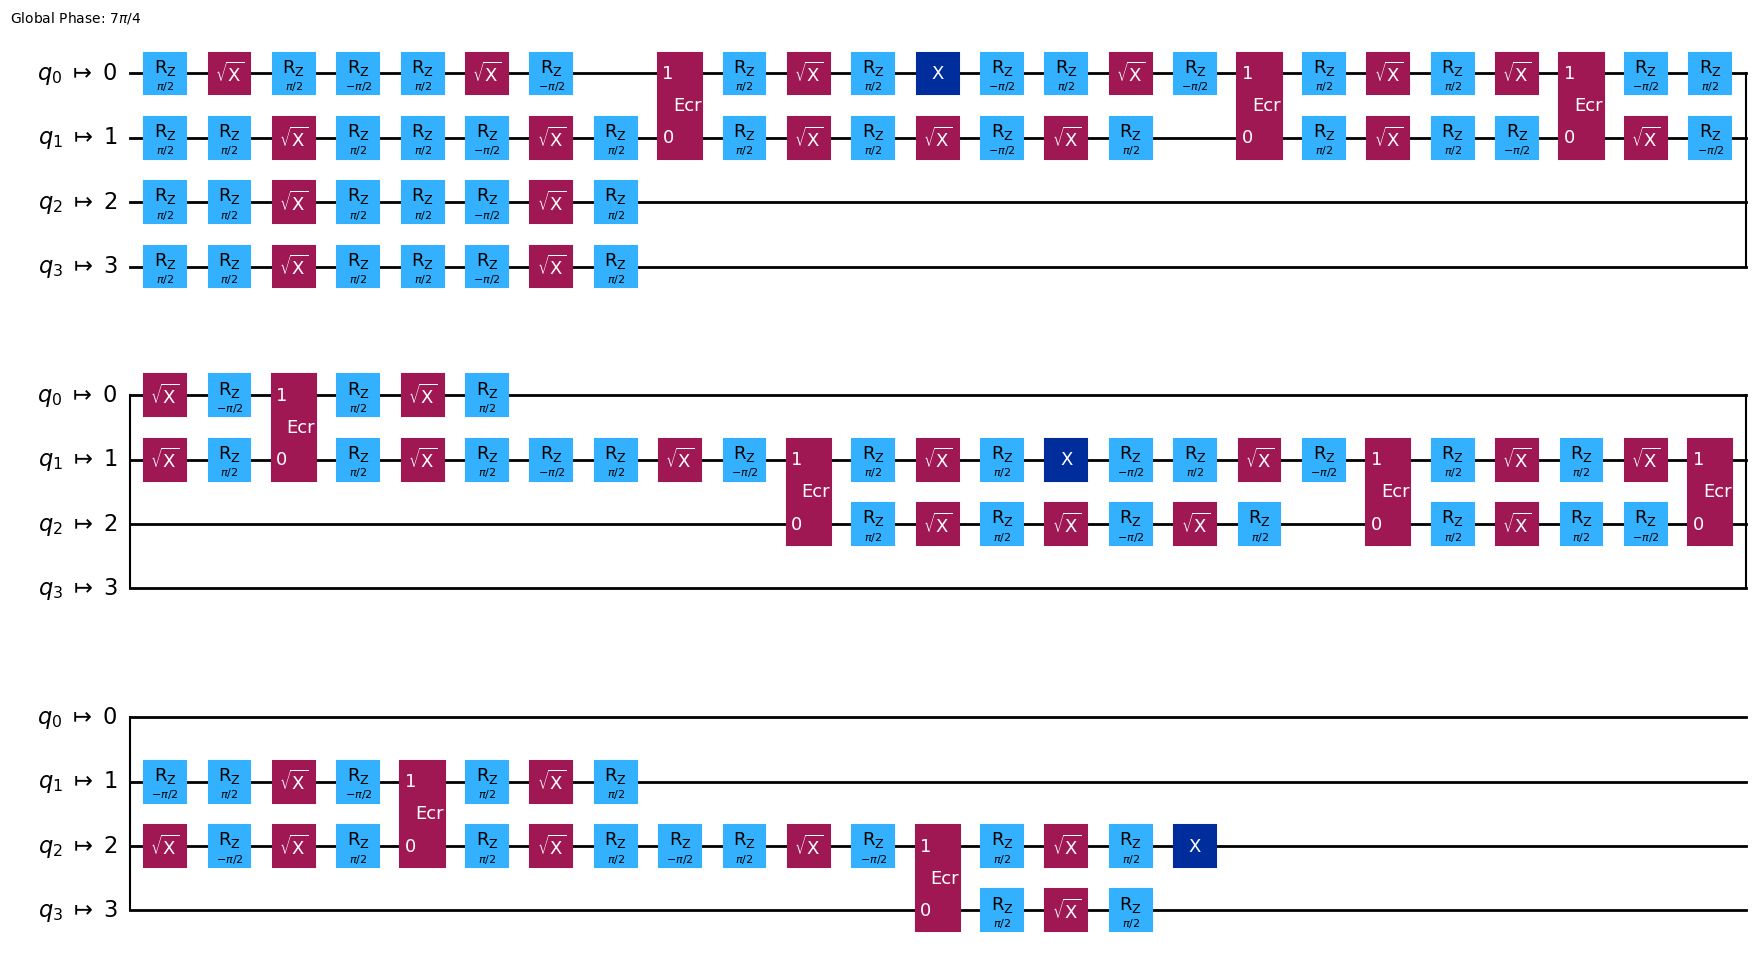

In [9]:
circuit_drawer(qc_brisbane_0, idle_wires=False, output='mpl')

Figure 8.5: Transpiled circuit of basis gates on Brisbane

Depth: 9


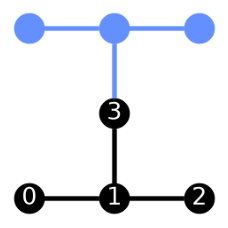

In [10]:
# Generate a preset pass manager:
# Modified by Alain Chancé
#pass_manager = generate_preset_pass_manager(backend=backend_nazca, optimization_level=0)
pass_manager = generate_preset_pass_manager(backend=backend_perth, optimization_level=0)

# Transpile the circuit with the optimization level = 0
qc_nazca_0 = pass_manager.run(qc)

print('Depth:', qc_nazca_0.depth())

#plot_circuit_layout(qc_nazca_0, backend_nazca)
try:
    display(plot_circuit_layout(qc_nazca_0, backend_perth))
except:
    print(sys.exc_info())

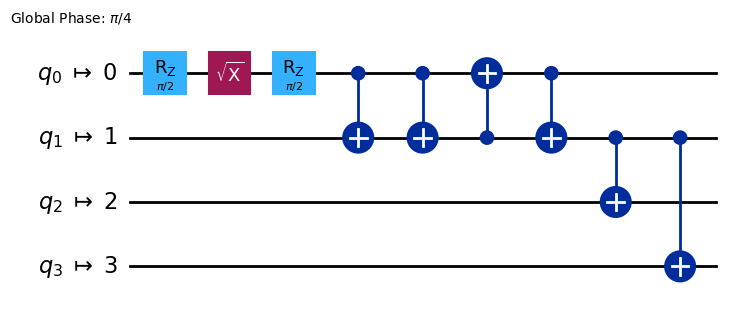

In [11]:
circuit_drawer(qc_nazca_0, idle_wires=False, output='mpl')

In [12]:
pass_manager = generate_preset_pass_manager(backend=backend_brisbane, optimization_level=3)
qc_transpiled_brisbane = pass_manager.run(qc)

Depth: 17
Ops count:  OrderedDict({'rz': 19, 'sx': 10, 'ecr': 3})


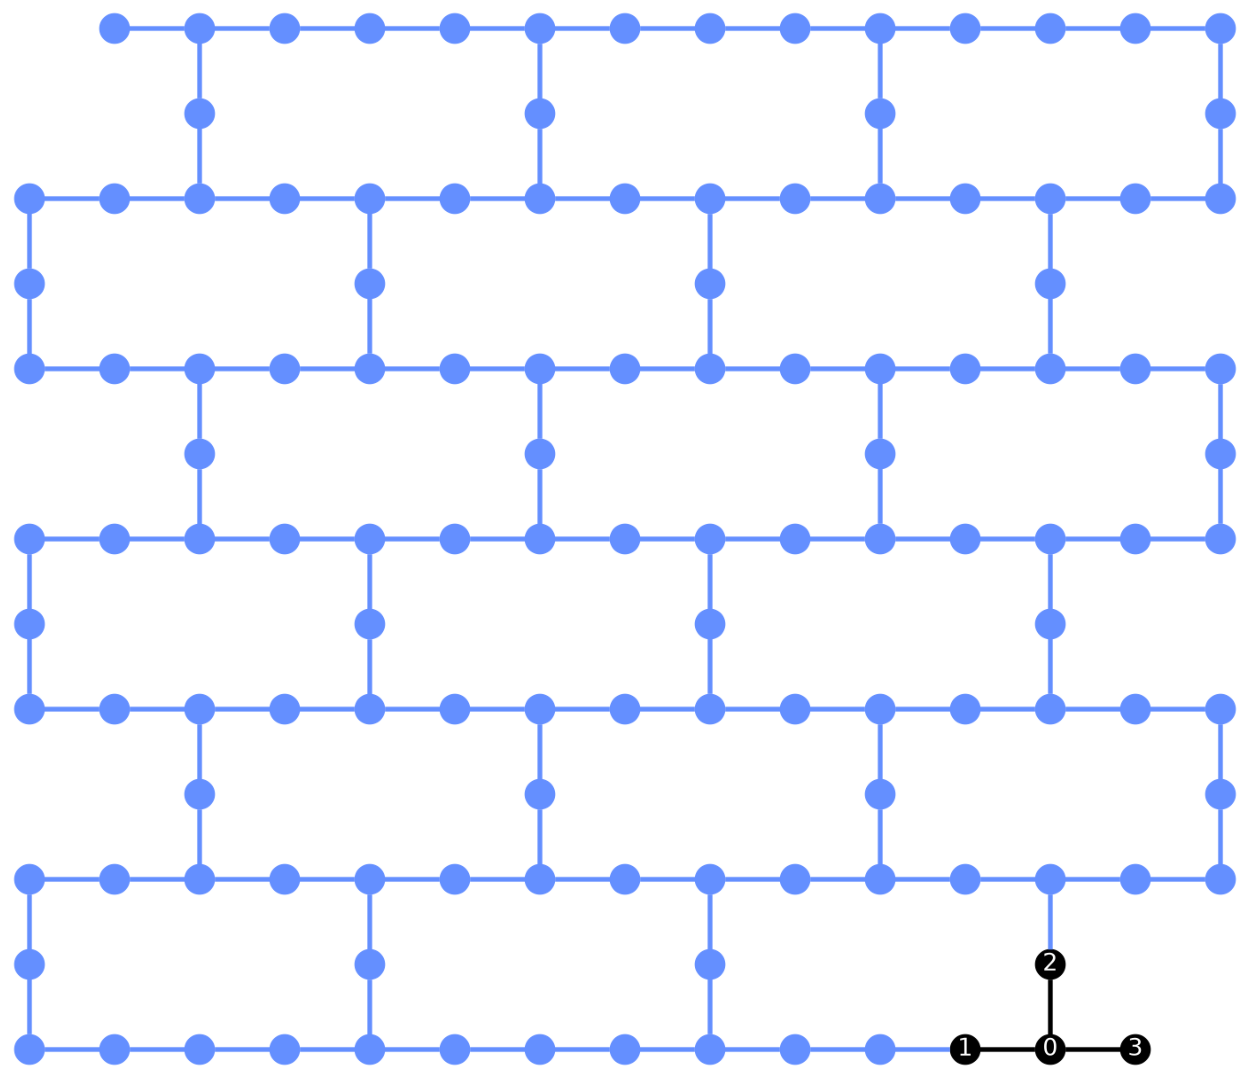

In [13]:
# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_brisbane.depth())
print('Ops count: ', qc_transpiled_brisbane.count_ops())

# Print the circuit layout
# Modified by Alain Chancé
try:
    display(plot_circuit_layout(qc_transpiled_brisbane, backend_brisbane))
except:
    print(sys.exc_info())

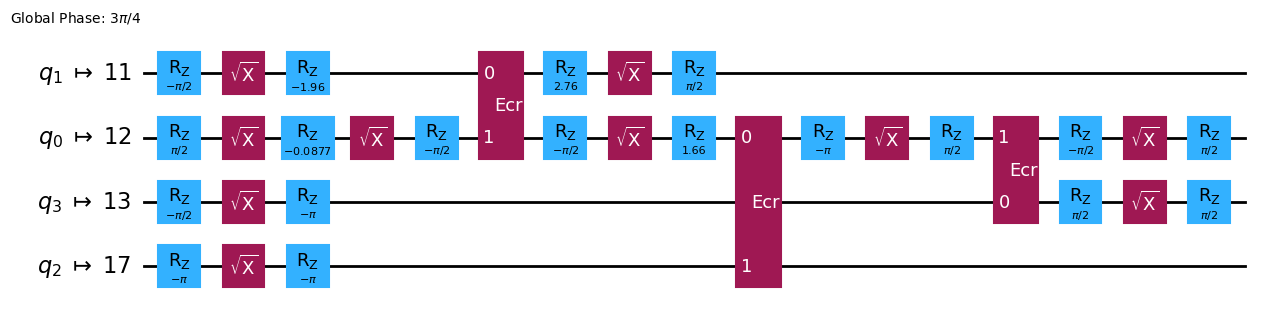

In [14]:
# Redraw the transpiled circuit at new level
circuit_drawer(qc_transpiled_brisbane, idle_wires=False, output='mpl')

Figure 8.7: Transpiled circuit on Brisbane

Depth: 6
Ops count:  OrderedDict({'cx': 3, 'rz': 2, 'sx': 1})


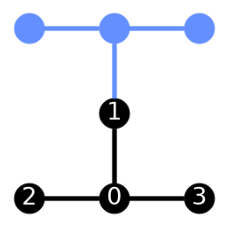

In [15]:
# Generate a preset pass manager for Nazca:
# Modified by Alain Chancé
#pass_manager = generate_preset_pass_manager(backend=backend_nazca, optimization_level=3)
pass_manager = generate_preset_pass_manager(backend=backend_perth, optimization_level=3)

# Transpile the circuit with the optimization level = 3
qc_transpiled_nazca = pass_manager.run(qc)

# Get the depth and operation count of the transpiled circuit. 
print('Depth:', qc_transpiled_nazca.depth())
print('Ops count: ', qc_transpiled_nazca.count_ops())

# Print the circuit layout
try:
    #plot_circuit_layout(qc_transpiled_nazca, backend_nazca)
    display(plot_circuit_layout(qc_transpiled_nazca, backend_perth))
except:
    print(sys.exc_info())

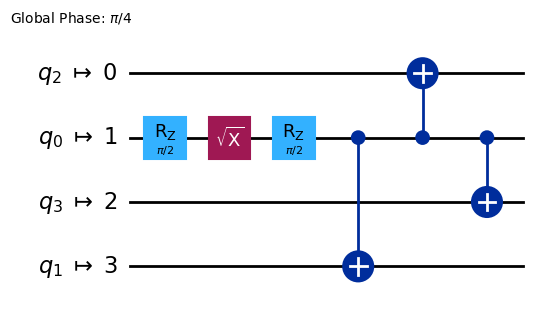

In [16]:
circuit_drawer(qc_transpiled_nazca, idle_wires=False, output='mpl')

Figure 8.10: Transpiled circuit with the optimization level set to 3

In [17]:
# Set the brisbane backend device to obtain configuration information
# Modified by Alain Chancé
#backend = service.get_backend('ibm_brisbane')
backend = FakeBrisbane()
backend

In [18]:
# Extract the coupling map from the backend
ibm_brisbane_coupling_map = backend.configuration().coupling_map
# List out the extracted coupling map
ibm_brisbane_coupling_map

[[1, 0],
 [2, 1],
 [3, 2],
 [4, 3],
 [4, 5],
 [4, 15],
 [6, 5],
 [6, 7],
 [7, 8],
 [8, 9],
 [10, 9],
 [10, 11],
 [11, 12],
 [12, 17],
 [13, 12],
 [14, 0],
 [14, 18],
 [15, 22],
 [16, 8],
 [16, 26],
 [17, 30],
 [18, 19],
 [20, 19],
 [20, 33],
 [21, 20],
 [21, 22],
 [22, 23],
 [24, 23],
 [24, 34],
 [25, 24],
 [26, 25],
 [27, 26],
 [28, 27],
 [28, 29],
 [28, 35],
 [30, 29],
 [30, 31],
 [31, 32],
 [32, 36],
 [33, 39],
 [34, 43],
 [35, 47],
 [36, 51],
 [37, 38],
 [39, 38],
 [40, 39],
 [40, 41],
 [41, 53],
 [42, 41],
 [42, 43],
 [43, 44],
 [44, 45],
 [46, 45],
 [46, 47],
 [48, 47],
 [48, 49],
 [50, 49],
 [50, 51],
 [52, 37],
 [52, 56],
 [53, 60],
 [54, 45],
 [54, 64],
 [55, 49],
 [55, 68],
 [56, 57],
 [57, 58],
 [58, 59],
 [58, 71],
 [59, 60],
 [60, 61],
 [62, 61],
 [62, 63],
 [62, 72],
 [63, 64],
 [65, 64],
 [65, 66],
 [67, 66],
 [67, 68],
 [69, 68],
 [69, 70],
 [73, 66],
 [74, 70],
 [74, 89],
 [75, 90],
 [76, 75],
 [77, 71],
 [77, 76],
 [77, 78],
 [79, 78],
 [79, 80],
 [80, 81],
 [81, 72],

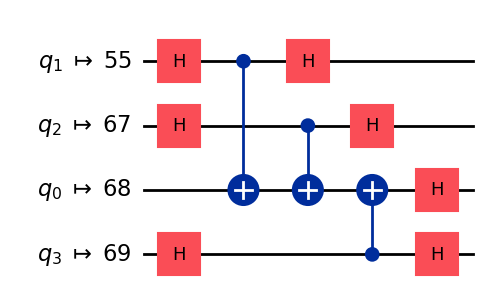

In [19]:
# Transpile the a custom circuit using only the coupling map. 
# Set the backend to None so it will force using the coupling map provided.
pass_manager = generate_preset_pass_manager(backend=None, optimization_level = 3, coupling_map=ibm_brisbane_coupling_map)
qc_custom= pass_manager.run(qc)

# Draw the resulting custom topology circuit.
circuit_drawer(qc_custom, idle_wires=False, output='mpl')

Figure 8.13: The custom circuit using the topology provided by the ibm_brisbane coupling map

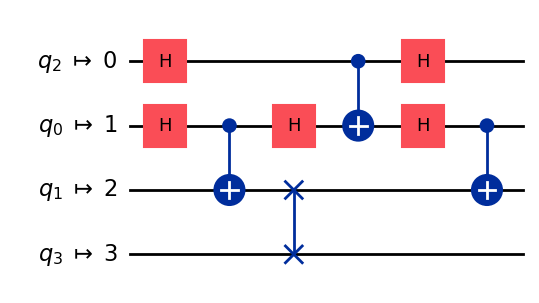

In [20]:
# Create our own coupling map (custom topology)
custom_linear_topology = [[0,1],[1,2],[2,3],[3,4]]

# Set the coupling map to our custom linear topology
#qc_custom = transpile(qc, backend=None, coupling_map=custom_linear_topology)
pass_manager = generate_preset_pass_manager(backend=None, optimization_level = 3, coupling_map=custom_linear_topology)
qc_custom= pass_manager.run(qc)

# Draw the resulting circuit.
circuit_drawer(qc_custom, idle_wires=False, output='mpl')

Figure 8.14: Custom linear topology of our circuit

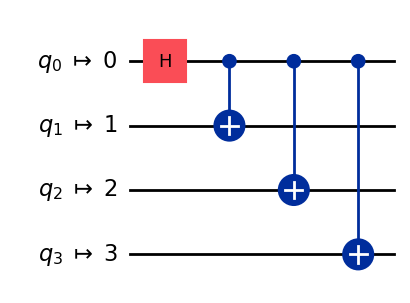

In [21]:
# Import the PassManager and a few Passes
from qiskit.transpiler import PassManager, CouplingMap
from qiskit.transpiler.passes import TrivialLayout, BasicSwap
pm = PassManager()

# Create a TrivialLayout based on the ibm_brisbane coupling map
trivial = TrivialLayout(CouplingMap(ibm_brisbane_coupling_map))
# Append the TrivialLayout to the PassManager
pm.append(trivial)
# Run the PassManager and draw the resulting circuit
tv_qc = pm.run(qc)
circuit_drawer(tv_qc, idle_wires=False, output='mpl')

Figure 8.15: PassManager with the appended TrivialLayout Pass circuit

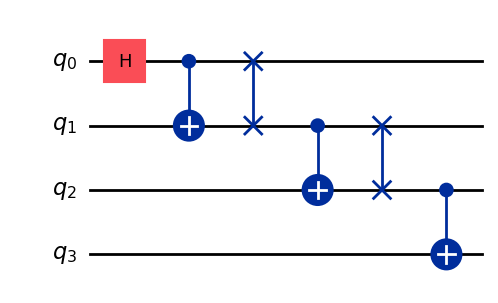

In [22]:
# Create a BasicSwap based on the ibm_brisbane coupling map we used earlier
basic_swap = BasicSwap(CouplingMap(ibm_brisbane_coupling_map))
#Add the BasicSwap to the PassManager
pm = PassManager(basic_swap)
# Run the PassManager and draw the results
new_qc = pm.run(qc)
circuit_drawer(new_qc, idle_wires=False, output='mpl')

Figure 8.16: PassManager with a BasicSwap router pass circuit

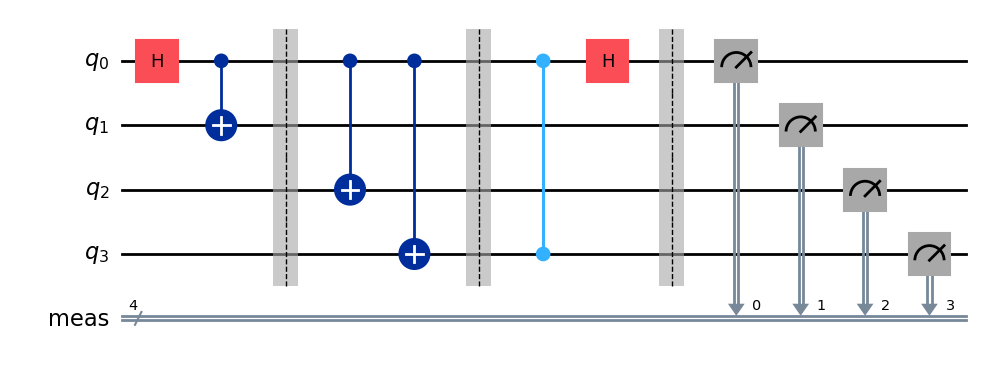

In [23]:
# Sample quantum circuit 
qc = QuantumCircuit(4)
qc.h(0)
qc.cx(0,1)
qc.barrier()
qc.cx(0,2)
qc.cx(0,3)
qc.barrier()
qc.cz(3,0)
qc.h(0)
qc.measure_all()
# Draw the circuit using the default renderer
circuit_drawer(qc, output='mpl')

Figure 8.17: Circuit rendering using the default library

If you’re running this on your local machine you may have some warnings or errors indicating you need to install some file dependencies, such as installing pylatexenc. 

To install this library you will need to run 
```
pip install pylatexenc
```
in a cell first, and then restart the kernel.

In [24]:
try:
    display(circuit_drawer(qc, output='latex'))
except:
    print(sys.exc_info())

(<class 'qiskit.exceptions.MissingOptionalLibraryError'>, MissingOptionalLibraryError("The 'pdflatex' library is required to use 'LaTeX circuit drawing'.  You will likely need to install a full LaTeX distribution for your system."), <traceback object at 0x742311827900>)


Figure 8.18: Circuit rendering using the latex library

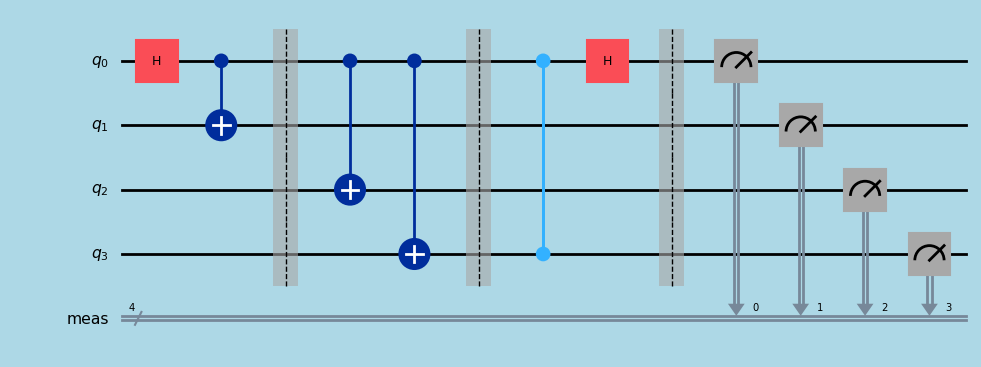

In [25]:
# Define the style to render the circuit and components
style = {'backgroundcolor': 'lightblue','gatefacecolor': 'white', 'gatetextcolor': 'black', 'fontsize': 9}
# Draw the mpl with the specified style
circuit_drawer(qc, style=style, output='mpl')

Figure 8.19: Rendered circuit with the custom style dictionary on matplotlib

### The 'Graphviz' library is required to use 'dag_drawer'. 
To install, follow the instructions at https://graphviz.org/download/. 
Qiskit needs the Graphviz binaries, which the 'graphviz' package on pip does not install.

You must install the actual Graphviz software.

On Debian, Ubuntu, run the following command: 
```
sudo apt install graphviz
```

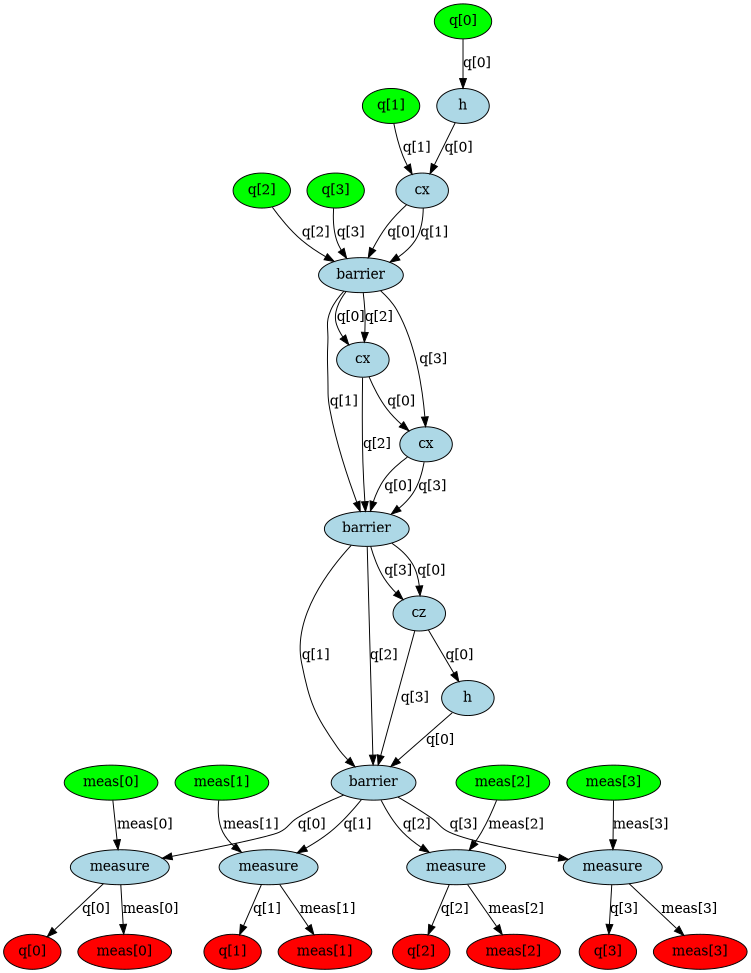

In [26]:
# Import the Circuit to DAG converter
from qiskit.converters import circuit_to_dag
# Import the DAG drawer
from qiskit.visualization import dag_drawer
# Convert the circuit into a DAG
dag = circuit_to_dag(qc)

# Draw the DAG of the circuit
try:
    display(dag_drawer(dag))
except:
    print(sys.exc_info())

Figure 8.20: The DAG rendering of a quantum circuit

## Qiskit packages versions

In [27]:
import qiskit
import qiskit_ibm_runtime
import qiskit_aer

print(f'Qiskit: {qiskit.__version__}')
print(f'Qiskit IBM Runtime: {qiskit_ibm_runtime.__version__}')
print(f"Qiskit Aer version: {qiskit_aer.__version__}")

Qiskit: 2.1.1
Qiskit IBM Runtime: 0.40.1
Qiskit Aer version: 0.17.1


## Show Python version

In [28]:
%%bash
which python
python --version

/home/alain/miniconda3/bin/python
Python 3.13.5
